In [36]:
import time

import matplotlib.pyplot as plt

from SYMQCircuit import *
from Tools import *

In [49]:
## Benchmarking computation time for single qubit rotations ##
_MAX_N_QUBITS = 15

rz_times = []
for n_qubits in range(1,_MAX_N_QUBITS+1):
    
    ## Creates circuits individually 
    circuit1 = SYMQCircuit(nr_qubits=n_qubits,precision=64)
    start = time.time()
    for qubit in range(n_qubits):
        circuit1.add_rz(qubit,angle=np.random.uniform(0,2*np.pi))
    end = time.time()
    rz_times.append(end-start)

cnot_times = []
for n_qubits in range(1,_MAX_N_QUBITS+1):
    
    ## Creates circuits individually 
    circuit1 = SYMQCircuit(nr_qubits=n_qubits,precision=64)
    start = time.time()
    for qubit in range(1,n_qubits):
        circuit1.add_cnot(target_qubit=qubit,control_qubit=qubit-1)
    end = time.time()
    cnot_times.append(end-start)

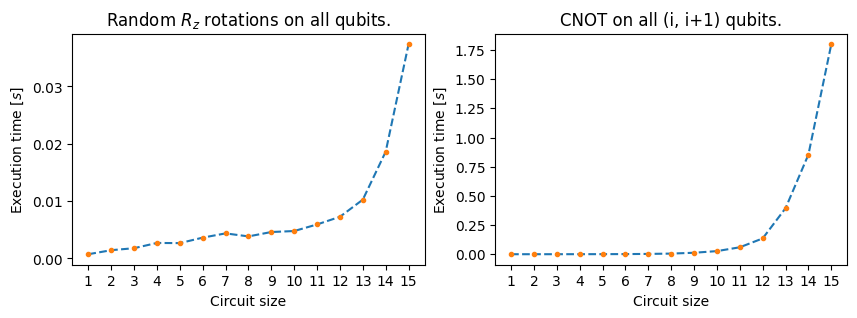

In [50]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].set_title("Random "+r"$R_z$"+" rotations on all qubits.",)
ax[1].set_title("CNOT on all (i, i+1) qubits.",)
n_qubits = [i for i in range(1,_MAX_N_QUBITS+1)]
ax[0].plot(n_qubits,rz_times,'--',label=r"$R_z$")
ax[0].plot(n_qubits,rz_times,'o',ms=3,label=r"$R_z$")
ax[1].plot(n_qubits,cnot_times,'--',label=r"$CX$")
ax[1].plot(n_qubits,cnot_times,'o',ms=3,label=r"$CX$")
ax[0].set_xticks(n_qubits)
ax[0].set_ylabel(r'Execution time $[s]$')
ax[0].set_xlabel("Circuit size")
ax[1].set_xticks(n_qubits)
ax[1].set_ylabel(r'Execution time $[s]$')
ax[1].set_xlabel("Circuit size")
plt.show()